# Introduction

Hi there!

In this tutorial you are gonna explore **kornia.morphology**, that's Kornia's module for Morphological Operators.

By the end, you will be able to use morphological operations as easy as:

`new_image = morph.operation(original_image, structuring_element)`

But first things first, let's prepare the environment.

# Pre-Process

### Download Kornia

If you don't have Kornia installed, you can download it using pip.

In [2]:
# Install Kornia
!pip install git+https://github.com/kornia/kornia

  Cloning https://github.com/kornia/kornia to /tmp/pip-req-build-644gj366
  Running command git clone -q https://github.com/kornia/kornia /tmp/pip-req-build-644gj366
  Created wheel for kornia: filename=kornia-0.4.2+af948c5-py2.py3-none-any.whl size=257031 sha256=cbc3581f2f6d45dfdd6011709b1395553d8cc5f30730e4b324c76ab290abfcc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-05amzxfu/wheels/5f/8b/92/375714dc479253f78ed777dd105d79f9693448dcfef85c8163
Successfully built kornia


### Prepare image

With Kornia.Morphology, you can apply morphological operators in 3 channel color images. Besides, all operators are differentiable.

Let's download and read an image.

In [3]:
# Download Image
url = 'https://image.shutterstock.com/image-photo/portrait-surprised-cat-scottish-straight-260nw-499196506.jpg'
 
!pip install wget
import wget
 
import cv2
 
im = cv2.imread(wget.download(url)) # Download Image
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # Define RGB

Kornia.morphology works with normalized 4-dim tensors (B,Ch,H,W), so before using any morphological operator we need to transform the image to tensor and normalize.

The tensor will be defined in memory with PyTorch as usual.

In [5]:
device = 'cpu' # 'cuda:0' for GPU

import kornia

tensor = kornia.image_to_tensor(im) # Image to tensor
tensor = tensor.to(device).float().unsqueeze(0)/255 # Add dimension and normalize


### Torchvision

Alternatively, you can use torchvision to deal with the image.

In [6]:
from torchvision import io
tensor = io.read_image(wget.download(url)).to(device).float().unsqueeze(0)/255

### Structuring element

We have the original image ready to go, now we need the second part in the operation, the structuring element (aka Kernel).

The kernel must be a 2-dim tensor with odd sides, i.e. 3x3.

In [7]:
import torch
kernel = torch.Tensor([[0,1,0],[1,1,1],[0,1,0]]).to(device)

### Making plots!

In this tutorial we are gonna compare the images before and after transforming them.

It make sense to create a function to plot and see the changes!

In [16]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_morph_image(tensor):

  # kornia.tensor_to_image
  image = kornia.tensor_to_image(tensor.squeeze(0)) # Tensor to image

  # Plot before-after
  rcParams['figure.figsize'] = 20 ,20
  fig, ax = plt.subplots(1,2)
  ax[0].axis('off')
  ax[0].imshow(im)
  ax[1].axis('off')
  ax[1].imshow(image)

# Morphology

The main goal of Kornia.Morphology is that you could easily implement several morphological operators:


1.   Dilation
2.   Erosion
3.   Opening
4.   Closing
5.   Morphological gradient
6.   Black Hat Transformation
7.   Top Hat Transformation

The way to go is pretty straightforward, just tipping the operator you want, followed by the image as tensor and the kernel:

`new_image = morph.operation(original_image, structuring_element)`

Let's check them all!

### Dilation

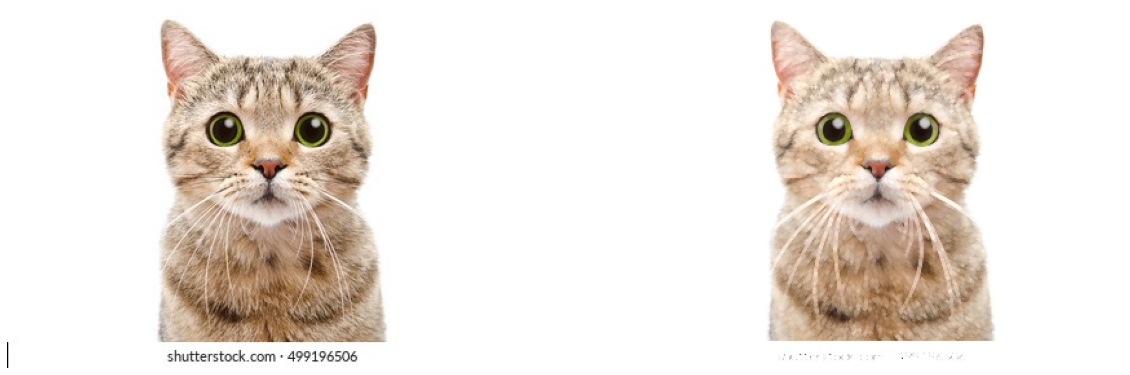

In [17]:
from kornia import morphology as morph

dilated_image = morph.dilation(tensor, kernel) # Dilation
plot_morph_image(dilated_image) # Plot

### Erosion

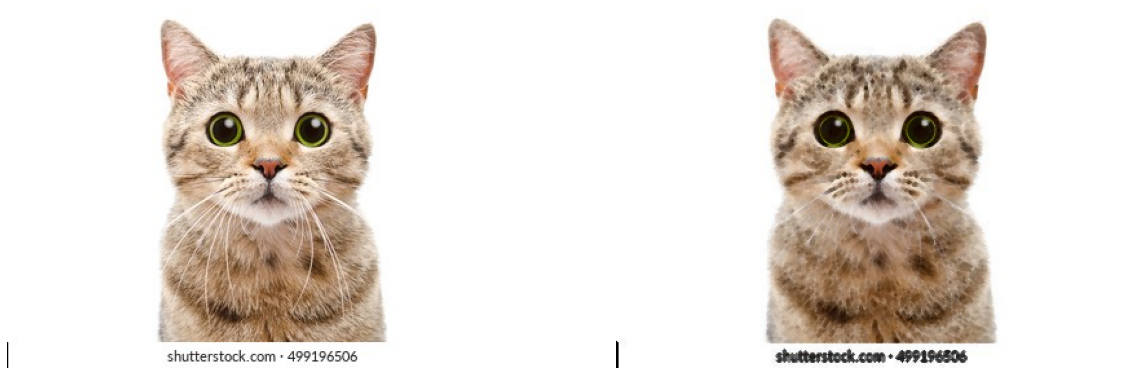

In [18]:
eroded_image = morph.erosion(tensor, kernel) # Erosion
plot_morph_image(eroded_image) # Plot

### Open

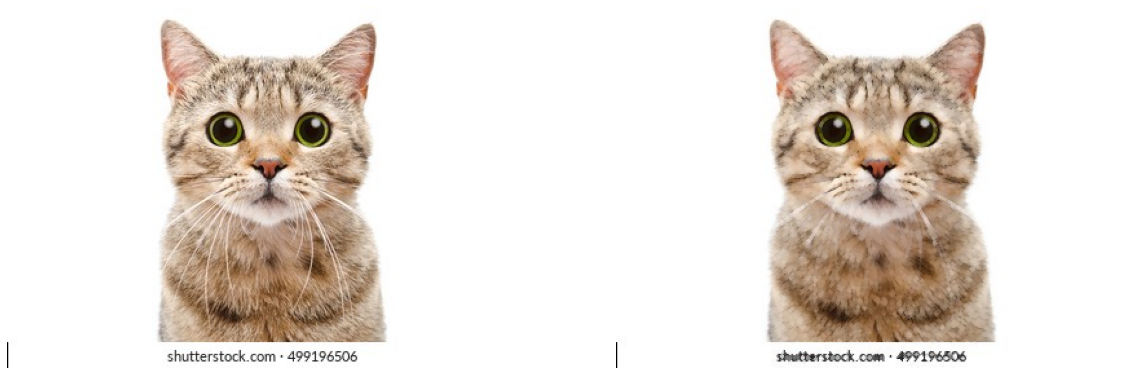

In [19]:
opened_image = morph.open(tensor, kernel) # Open
plot_morph_image(opened_image)

### Close

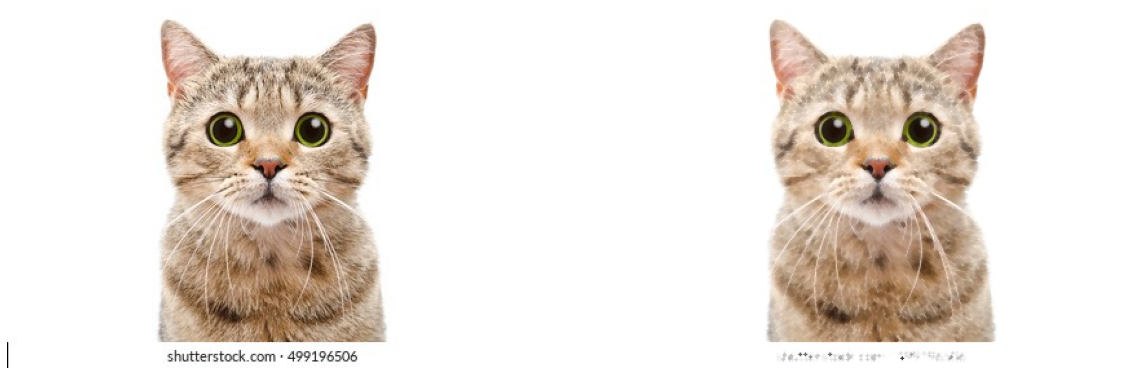

In [20]:
closed_image = morph.close(tensor, kernel) # Close
plot_morph_image(closed_image) # Plot

### Morphological Gradient

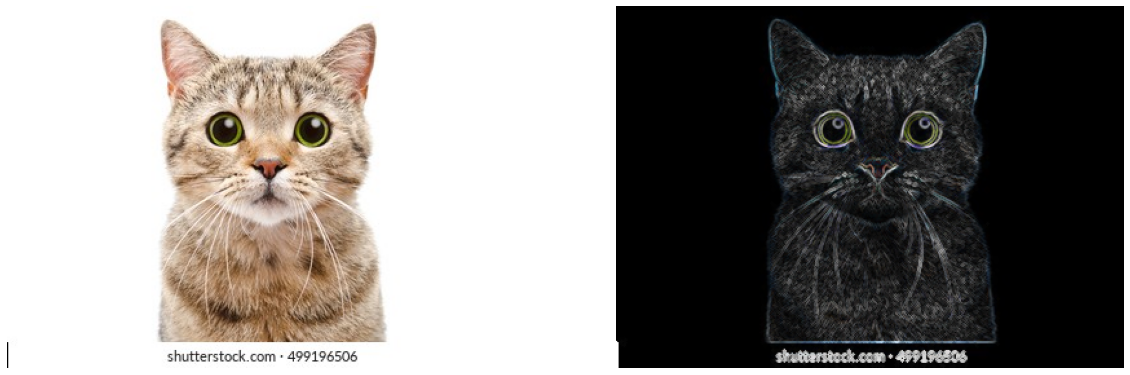

In [21]:
graded_image = morph.gradient(1-tensor, kernel) # Morphological gradient
plot_morph_image(graded_image)

### Black Hat

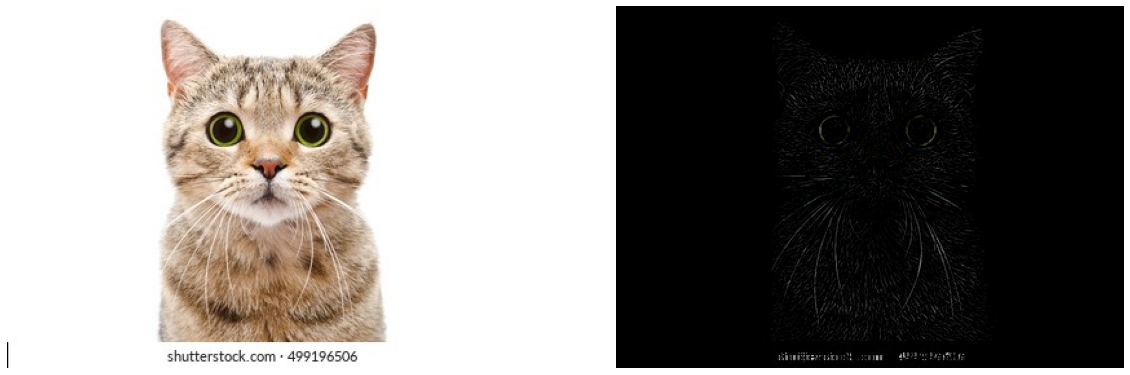

In [22]:
black_image = morph.black_hat(1-tensor, kernel) # Black Hat
plot_morph_image(black_image)

### Top Hat

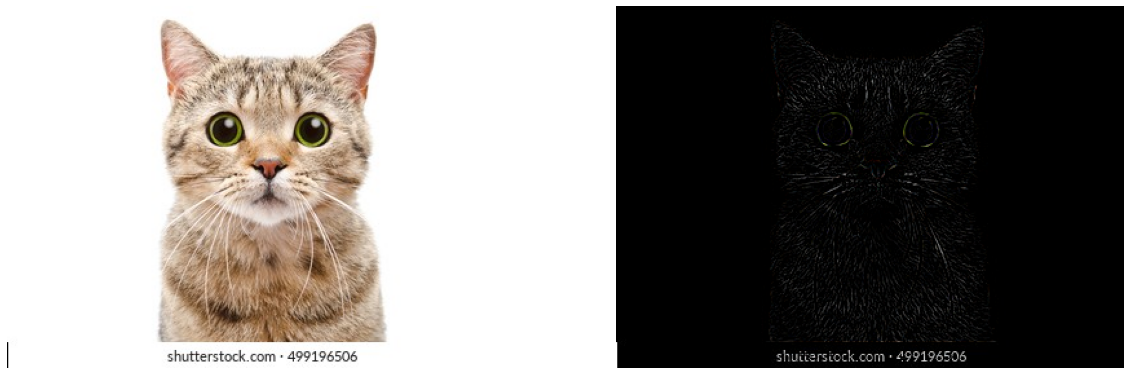

In [23]:
toph_image = morph.top_hat(1-tensor, kernel) # Top Hat
plot_morph_image(toph_image)

# Conclusion

And that's it!

Now you know how to use Kornia to apply differentiable morphological operations in your PyTorch pipeline.

Many thanks for using Kornia, and have fun!